# Scrape the Wikipedia page

In order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

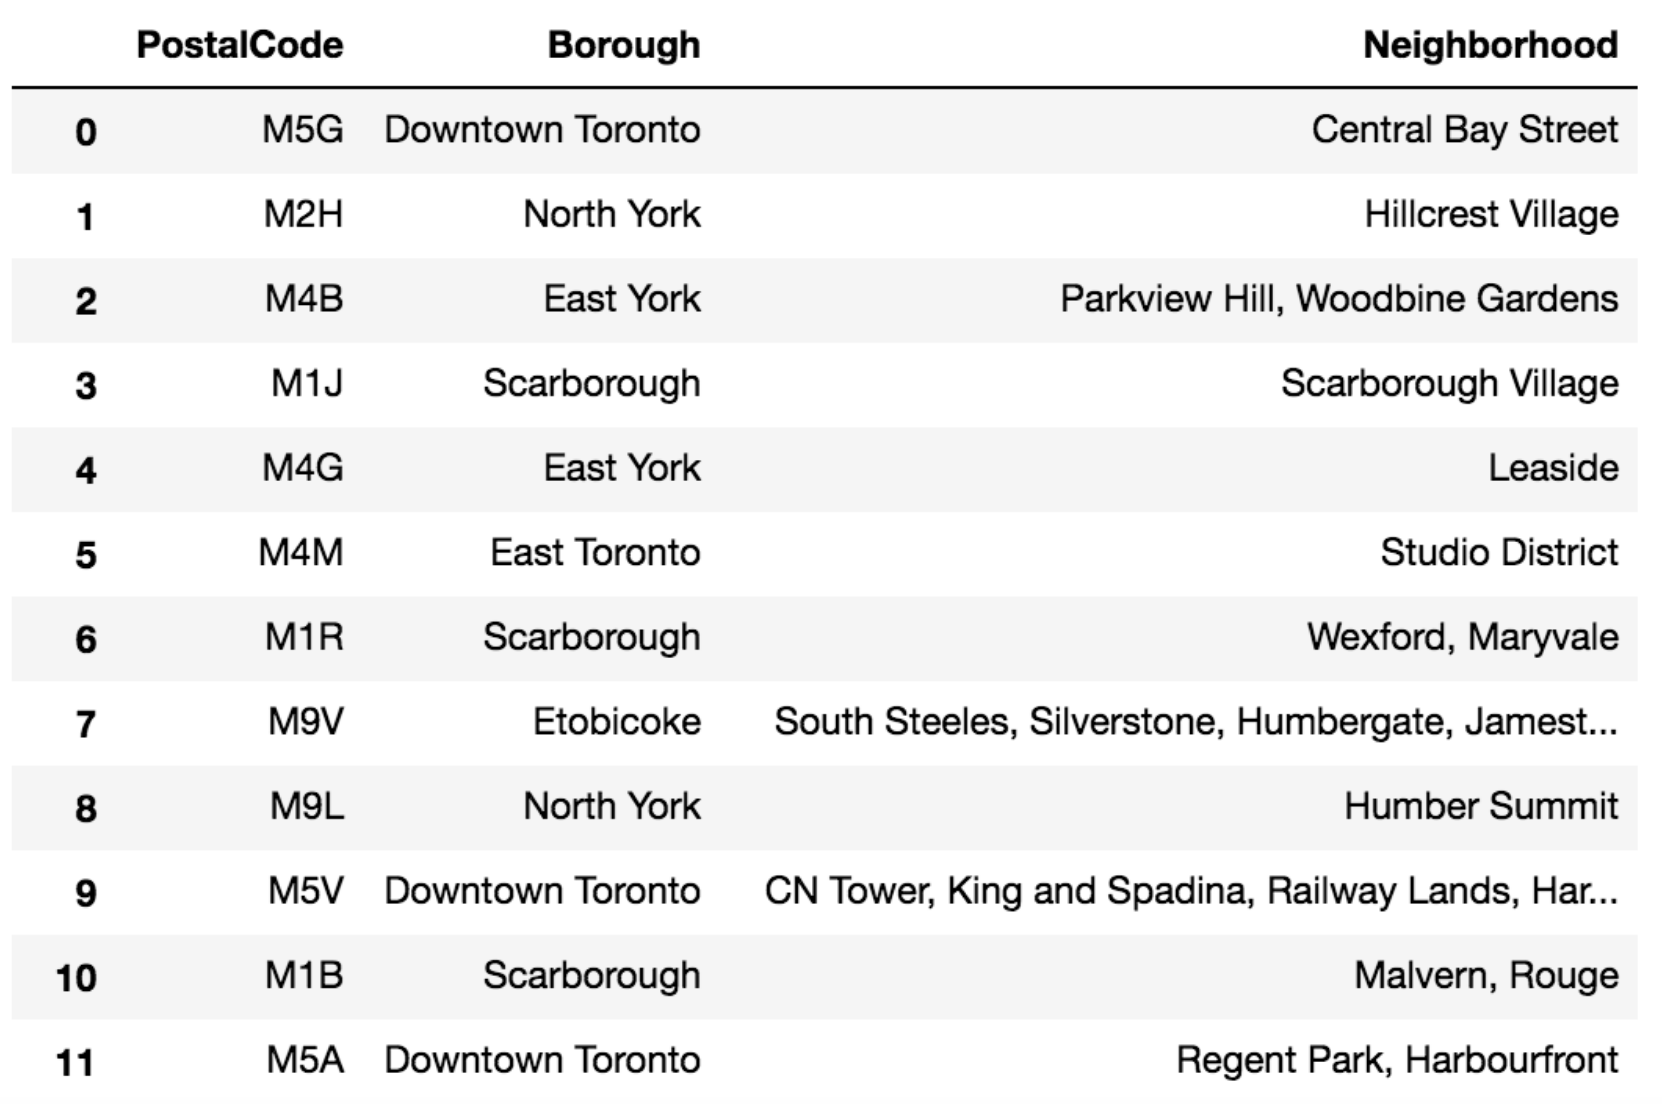

## My implementation 

Scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

#set URL
html = urlopen("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
bsObj = BeautifulSoup(html, "html.parser")


In [2]:
#find table
table = bsObj.findAll("table",{"class":"wikitable sortable"})[0]
rows = table.findAll("tr")

In [3]:
# store as list
import pandas as pd

lst_table = pd.read_html(str(table))
lst_table[0].head()

,0,1,2
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [4]:
# store as dataframe
df_table = pd.DataFrame(lst_table[0])
df_table.head()

,0,1,2
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [5]:
# define the dataframe columns
df_table.columns = ['Postcode', 'Borough', 'Neighbourhood']

In [6]:
df_table.head()

,Postcode,Borough,Neighbourhood
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [7]:
#drop the first row (same as column name)
df_table.drop(0, axis=0, inplace=True, )
df_table.head()

,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [9]:
#reset index
df_table.reset_index(drop=True, inplace=True)
df_table.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [10]:
# drop rows with a borough that is Not assigned
df_table = df_table[df_table['Borough'] != 'Not assigned']
df_table.reset_index(drop=True, inplace=True)
df_table

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [11]:
df_table[df_table['Neighbourhood'] == 'Not assigned']

,Postcode,Borough,Neighbourhood
6,M7A,Queen's Park,Not assigned


In [12]:
df_table.iloc[6, 2]

'Not assigned'

In [13]:
# set the same name as Borough to Neighbourhood of "Not assigned" 
df_table.iloc[6, 2] = "Queen's Park"
df_table

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [14]:
df_table[df_table['Neighbourhood'] == 'Not assigned']

,Postcode,Borough,Neighbourhood


In [15]:
df_table.shape

(212, 3)

More than one neighborhood can exist in one postal code area. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [16]:
# count the multi neighborhoods in one postal code area
df_table.groupby(['Postcode','Borough']).count()

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,2
M1C,Scarborough,3
M1E,Scarborough,3
M1G,Scarborough,1
M1H,Scarborough,1
M1J,Scarborough,1
M1K,Scarborough,3
M1L,Scarborough,3
M1M,Scarborough,3


In [17]:
# combined into one row with the neighborhoods separated with a comma
df_table = df_table.groupby(['Postcode','Borough']).Neighbourhood.apply(lambda s : ', '.join(s))
df_table

Postcode  Borough         
M1B       Scarborough                                            Rouge, Malvern
M1C       Scarborough                    Highland Creek, Rouge Hill, Port Union
M1E       Scarborough                         Guildwood, Morningside, West Hill
M1G       Scarborough                                                    Woburn
M1H       Scarborough                                                 Cedarbrae
M1J       Scarborough                                       Scarborough Village
M1K       Scarborough               East Birchmount Park, Ionview, Kennedy Park
M1L       Scarborough                           Clairlea, Golden Mile, Oakridge
M1M       Scarborough           Cliffcrest, Cliffside, Scarborough Village West
M1N       Scarborough                               Birch Cliff, Cliffside West
M1P       Scarborough         Dorset Park, Scarborough Town Centre, Wexford ...
M1R       Scarborough                                         Maryvale, Wexford
M1S       Sca

In [19]:
df_table.shape

(103,)

In [20]:
df_adjust = pd.DataFrame(df_table)

In [21]:
df_adjust 

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"


In [22]:
# reset index
df_adjust.reset_index(inplace = True)

In [23]:
df_adjust.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [24]:
df_adjust.shape

(103, 3)